In [1]:
import pandas as pd
import json
import os
import statsmodels.api as sm

In [2]:
os.chdir('/Users/HELoz/Downloads')

In [3]:
# Reading the json as a dict
with open('es_sentiment.json') as json_data:
    data = json.load(json_data)

In [4]:
# using the from_dict load function. Note that the 'orient' parameter 
#is not using the default value (or it will give the same error that you got before)
# We transpose the resulting df and set index column as its index to get this result
df = pd.DataFrame.from_dict(data, orient='index')
df

,0,1,2,3,4,5,6,7,8,9,...,3793,3794,3795,3796,3797,3798,3799,3800,3801,3802
070 Shake,"{'time': '2020-09-21T22:55:33Z', 'sentiment': ...","{'time': '2020-09-21T22:56:17Z', 'sentiment': ...","{'time': '2020-09-21T22:57:00Z', 'sentiment': ...","{'time': '2020-09-21T22:57:56Z', 'sentiment': ...","{'time': '2020-09-21T22:58:56Z', 'sentiment': ...","{'time': '2020-09-21T23:02:13Z', 'sentiment': ...","{'time': '2020-09-21T23:05:35Z', 'sentiment': ...","{'time': '2020-09-21T23:05:48Z', 'sentiment': ...","{'time': '2020-09-22T20:06:30Z', 'sentiment': ...","{'time': '2020-10-23T10:48:57Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
A Star Is Born (banda sonora),"{'time': '2018-09-16T23:48:15Z', 'sentiment': ...","{'time': '2018-09-29T23:53:45Z', 'sentiment': ...","{'time': '2018-09-29T23:54:20Z', 'sentiment': ...","{'time': '2018-09-30T00:00:00Z', 'sentiment': ...","{'time': '2018-10-04T23:55:49Z', 'sentiment': ...","{'time': '2018-10-06T12:34:39Z', 'sentiment': ...","{'time': '2018-10-06T13:06:53Z', 'sentiment': ...","{'time': '2018-10-07T00:01:07Z', 'sentiment': ...","{'time': '2018-10-09T13:59:54Z', 'sentiment': ...","{'time': '2018-10-09T14:01:04Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
A. J. Applegate,"{'time': '2016-07-07T16:41:33Z', 'sentiment': ...","{'time': '2016-07-07T16:50:16Z', 'sentiment': ...","{'time': '2016-07-07T16:51:48Z', 'sentiment': ...","{'time': '2016-07-07T16:53:44Z', 'sentiment': ...","{'time': '2016-07-07T16:55:49Z', 'sentiment': ...","{'time': '2016-07-07T16:59:43Z', 'sentiment': ...","{'time': '2016-07-07T17:00:17Z', 'sentiment': ...","{'time': '2016-07-07T17:00:20Z', 'sentiment': ...","{'time': '2016-07-07T17:02:15Z', 'sentiment': ...","{'time': '2016-07-07T17:07:36Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Aal de Dragonder,"{'time': '2020-04-10T13:10:00Z', 'sentiment': ...","{'time': '2020-04-10T13:11:16Z', 'sentiment': ...","{'time': '2020-04-10T14:20:14Z', 'sentiment': ...",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Aaron Copland,"{'time': '2004-03-29T21:48:00Z', 'sentiment': ...","{'time': '2004-03-29T21:50:25Z', 'sentiment': ...","{'time': '2004-03-29T21:51:26Z', 'sentiment': ...","{'time': '2004-03-29T21:52:30Z', 'sentiment': ...","{'time': '2004-03-29T21:53:51Z', 'sentiment': ...","{'time': '2004-03-29T21:54:08Z', 'sentiment': ...","{'time': '2004-03-29T21:55:20Z', 'sentiment': ...","{'time': '2004-03-29T23:42:10Z', 'sentiment': ...","{'time': '2004-03-29T23:42:43Z', 'sentiment': ...","{'time': '2004-04-24T14:34:44Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ángel Garó,"{'time': '2007-03-23T07:32:41Z', 'sentiment': ...","{'time': '2007-03-23T18:37:15Z', 'sentiment': ...","{'time': '2007-03-30T11:58:46Z', 'sentiment': ...","{'time': '2007-04-17T10:25:47Z', 'sentiment': ...","{'time': '2007-04-17T11:30:15Z', 'sentiment': ...","{'time': '2007-04-22T18:47:22Z', 'sentiment': ...","{'time': '2007-05-06T18:48:17Z', 'sentiment': ...","{'time': '2007-07-20T22:28:20Z', 'sentiment': ...","{'time': '2007-08-14T01:06:16Z', 'sentiment': ...","{'time': '2007-08-14T01:06:37Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Ángel Pavlovsky,"{'time': '2011-07-16T09:20:54Z', 'sentiment': ...","{'time': '2011-07-16T09:21:06Z', 'sentiment': ...","{'time': '2011-07-16T09:21:41Z', 'sentiment': ...","{'time': '2011-07-16T09:22:43Z', 'sentiment': ...","{'time': '2011-07-16T09:26:59Z', 'sentiment': ...","{'time': '2011-07-16T09:27:14Z', 'sentiment': ...","{'time': '2011-07-16T09:31:04Z', 'sentiment': ...","{'time': '2011-07-16T09:49:36Z', 'sentiment': ...","{'time': '2011-07-16T09:50:02Z', 'sentiment': ...","{'time': '2011-07-16T09:50:29Z', 'sentiment': ...",...,None,None,None,None,None,None,None,None,None,None
Ángeles Álvarez,"{'time': '2011-12

In [6]:
def to_year(string):
    year = string[0:4]
    return int(year)

In [7]:
def to_dataframe(df):
    dflist = []
    for i in range(len(df)):
        mini = df.iloc[i].dropna()
        time = []
        sentiment = []
        for j in range(len(mini)):
            time.append(mini[j]['time'])
            sentiment.append(mini[j]['sentiment'])
        dfn = pd.DataFrame({'time': time, 'sentiment': sentiment})
        dfn['time'] = dfn['time'].apply(to_year)
        dfn = (dfn.groupby('time')['sentiment'].mean()).to_frame().reset_index().rename(columns={"time": "year", "sentiment": "avg_sentiment"})
        dfn['article name'] = mini.name
        dflist.append(dfn)
    new_df = pd.concat(dflist, ignore_index=True)
    return new_df

In [8]:
new_df = to_dataframe(df)
new_df

,year,avg_sentiment,article name
0,2020,0.087078,070 Shake
1,2018,0.077079,A Star Is Born (banda sonora)
2,2019,0.268162,A Star Is Born (banda sonora)
3,2020,0.520899,A Star Is Born (banda sonora)
4,2021,0.511271,A Star Is Born (banda sonora)
...,...,...,...
8223,2017,0.700709,Óscar Esquivias
8224,2018,0.781360,Óscar Esquivias
8225,2019,0.773392,Óscar Esquivias
8226,2020,0.823398,Óscar Esquivias


In [9]:
dum = pd.get_dummies(new_df['article name'], drop_first=True)
dum

,A Star Is Born (banda sonora),A. J. Applegate,Aal de Dragonder,Aaron Copland,Aaron Yan,Abelardo Estorino,Abraham Ángel,Adam Shankman,Adela Hernández,Adore Delano,...,Yuricon,Yurikuma Arashi,YuruYuri,Zanele Muholi,Ángel Garó,Ángel Pavlovsky,Ángel de Brito,Ángeles Álvarez,Émilienne d'Alençon,Óscar Esquivias
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
new_df = new_df.join(dum).drop('article name', axis=1)
new_df

,year,avg_sentiment,A Star Is Born (banda sonora),A. J. Applegate,Aal de Dragonder,Aaron Copland,Aaron Yan,Abelardo Estorino,Abraham Ángel,Adam Shankman,...,Yuricon,Yurikuma Arashi,YuruYuri,Zanele Muholi,Ángel Garó,Ángel Pavlovsky,Ángel de Brito,Ángeles Álvarez,Émilienne d'Alençon,Óscar Esquivias
0,2020,0.087078,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,0.077079,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,0.268162,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020,0.520899,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021,0.511271,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,2017,0.700709,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8224,2018,0.781360,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8225,2019,0.773392,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8226,2020,0.823398,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
cols = list(new_df.columns)
cols.remove('avg_sentiment')

In [12]:
Y = new_df['avg_sentiment']
X = new_df[cols]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
p = results.params

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          avg_sentiment   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     52.79
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:26:12   Log-Likelihood:                 7581.3
No. Observations:                8228   AIC:                        -1.320e+04
Df Residuals:                    7245   BIC:                            -6301.
Df Model:                         982                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [15]:
import matplotlib.pyplot as plt

(-0.1, 1.1)

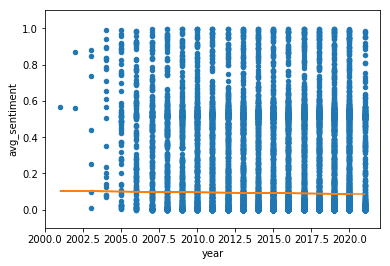

In [16]:
ax = new_df.plot(x='year', y='avg_sentiment', kind='scatter')
ax.plot(X, p.const + p.year * X)
ax.set_xlim([2000, 2022])
ax.set_ylim([-0.1, 1.1])